In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df = pd.read_csv('sales_train.csv')

In [3]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
tvs = df.pivot_table(index='date',values='item_cnt_day',aggfunc=sum)

In [5]:
tvs.head()

,item_cnt_day
date,
01.01.2013,1951.0
01.01.2014,2310.0
01.01.2015,2117.0
01.02.2013,3817.0
01.02.2014,5711.0


In [6]:
tvs.index = pd.to_datetime(tvs.index)

In [9]:
tvs.sort_index().head()

,item_cnt_day
date,
2013-01-01,1951.0
2013-01-02,3817.0
2013-01-03,3846.0
2013-01-04,2574.0
2013-01-05,4863.0


In [10]:
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

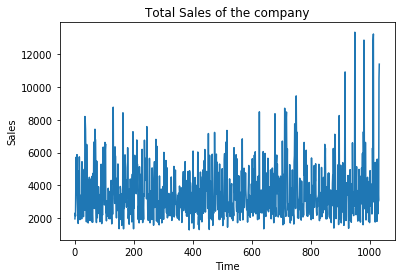

In [13]:
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(tvs.values)

In [14]:
#monthly

In [15]:
tvs = df.pivot_table(index='date_block_num',values='item_cnt_day',aggfunc=sum)

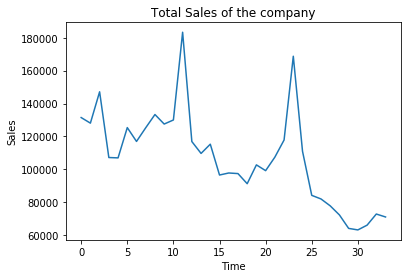

In [16]:
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(tvs.values)

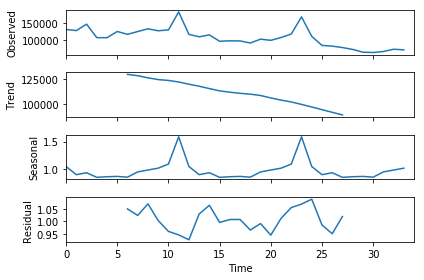

In [178]:
import statsmodels.api as sm
# multiplicative model
res = sm.tsa.seasonal_decompose(tvs.values,freq=12,model="multiplicative")
fig = res.plot()

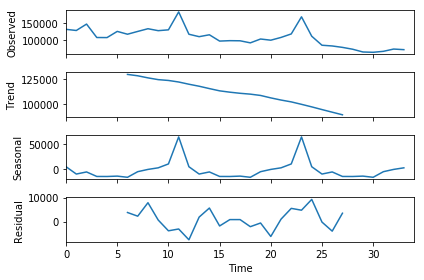

In [142]:
#additive
res = sm.tsa.seasonal_decompose(tvs.values,freq=12,model="additive")
fig = res.plot()

In [25]:
#Stationarity test
tvs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 1 columns):
item_cnt_day    34 non-null float64
dtypes: float64(1)
memory usage: 544.0 bytes


In [46]:
adfuller(tvs['item_cnt_day'])

(-2.395704066994433,
 0.1429525769929046,
 0,
 33,
 {'1%': -3.6461350877925254,
  '10%': -2.6159676124885216,
  '5%': -2.954126991123355},
 530.9537360897348)

In [44]:
tvs.columns

Index([u'item_cnt_day'], dtype='object')

In [54]:
def stationarity(tvs):
    adf = adfuller(tvs,autolag='AIC');
    dfout = pd.Series(adf[0:4],index= ['t-Stat','p-value','lags','Number of samples used'])
    for key,value in adf[4].items():
        dfout['Critical Value %s'%key] = value
    print(dfout)


In [55]:
stationarity(tvs['item_cnt_day'])

t-Stat                    -2.395704
p-value                    0.142953
lags                       0.000000
Number of samples used    33.000000
Critical Value 5%         -2.954127
Critical Value 1%         -3.646135
Critical Value 10%        -2.615968
dtype: float64


In [68]:
stationarity(tvs.diff().dropna()['item_cnt_day'])

t-Stat                   -1.363622e+01
p-value                   1.686395e-25
lags                      1.000000e+01
Number of samples used    2.200000e+01
Critical Value 5%        -3.005426e+00
Critical Value 1%        -3.769733e+00
Critical Value 10%       -2.642501e+00
dtype: float64


In [60]:
tvs.isnull().sum()

item_cnt_day    0
dtype: int64

In [80]:
plt.figure(figsize=(16,24))

<Figure size 1152x1728 with 0 Axes>

<Figure size 1152x1728 with 0 Axes>

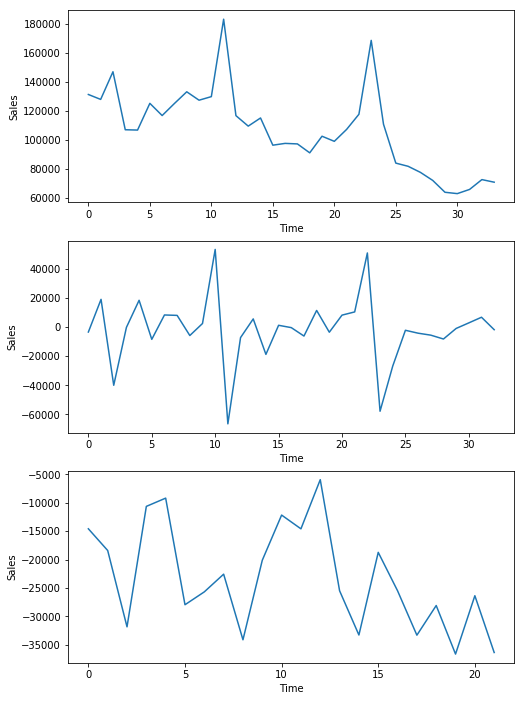

In [171]:
plt.figure(figsize=(8,12))
plt.subplot(311)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(tvs.values)
plt.subplot(312)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(tvs.diff().dropna().values)
plt.subplot(313)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(tvs.diff(12).dropna().values)

In [172]:
stationarity(tvs['item_cnt_day'])
stationarity(tvs.diff().dropna()['item_cnt_day'])
stationarity(tvs.diff(12).dropna()['item_cnt_day'])

t-Stat                    -2.395704
p-value                    0.142953
lags                       0.000000
Number of samples used    33.000000
Critical Value 5%         -2.954127
Critical Value 1%         -3.646135
Critical Value 10%        -2.615968
dtype: float64
t-Stat                   -1.363622e+01
p-value                   1.686395e-25
lags                      1.000000e+01
Number of samples used    2.200000e+01
Critical Value 5%        -3.005426e+00
Critical Value 1%        -3.769733e+00
Critical Value 10%       -2.642501e+00
dtype: float64
t-Stat                    -3.270101
p-value                    0.016269
lags                       0.000000
Number of samples used    21.000000
Critical Value 5%         -3.013098
Critical Value 1%         -3.788386
Critical Value 10%        -2.646397
dtype: float64


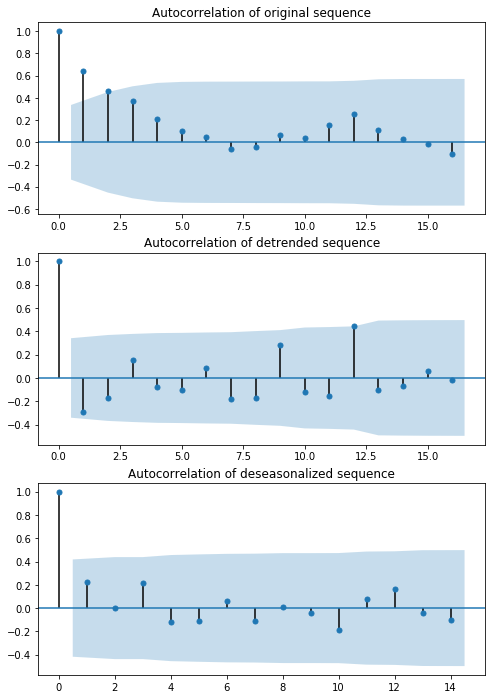

In [173]:
ACF = plt.figure(figsize=(8,12))
ax1 = ACF.add_subplot(311)
ax2 = ACF.add_subplot(312)
ax3 = ACF.add_subplot(313)
ACF = plot_acf(tvs,ax=ax1,title = 'Autocorrelation of original sequence')
ACF = plot_acf(tvs.diff().dropna(),ax=ax2,title = 'Autocorrelation of detrended sequence')
ACF = plot_acf(tvs.diff(12).dropna(),ax=ax3,title = 'Autocorrelation of deseasonalized sequence')

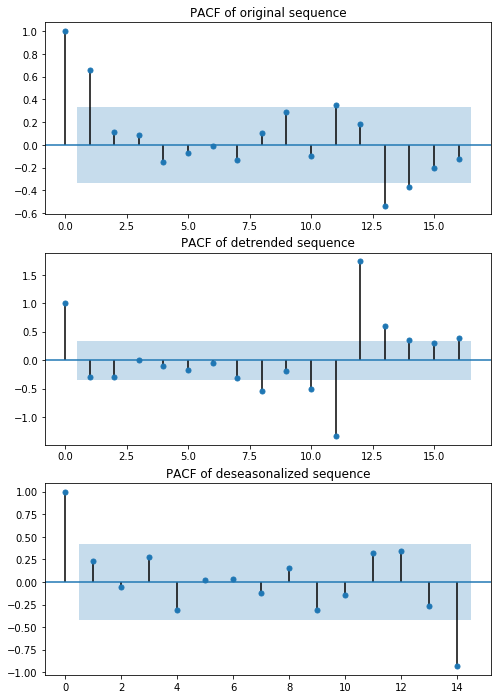

In [174]:
PACF = plt.figure(figsize=(8,12))
ax1 = PACF.add_subplot(311)
ax2 = PACF.add_subplot(312)
ax3 = PACF.add_subplot(313)
ACF = plot_pacf(tvs,ax=ax1,title = 'PACF of original sequence')
ACF = plot_pacf(tvs.diff().dropna(),ax=ax2,title = 'PACF of detrended sequence')
ACF = plot_pacf(tvs.diff(12).dropna(),ax=ax3,title = 'PACF of deseasonalized sequence')

In [107]:
# from ACF and PACF plots, it is clear that this is an ARMA process. Lets find the order

In [108]:
model = ARIMA(tvs.diff(12).dropna(), order=(1,0,1))

/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [110]:
result = model.fit()

/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [111]:
result

In [112]:
# ARIMA didnot work. 

In [186]:
best_aic = np.inf
best_model = None
best_order = None
lag = 12
count = 0
for i in range(0,5):
    for j in range(0,5):
        try:
            temporary_model = smt.ARMA(tvs.diff(lag).dropna().values, order=(i,j)).fit(method='mle',trend ='nc')
            temporary_aic = temporary_model.aic
            if temporary_aic < best_aic:
                best_aic = temporary_aic
                best_order = (i,j)
                best_model = temporary_model
                count = count + 1
        except: continue
print('Best AIC: {} | Best Order: {} | Count: {}'.format(best_aic,best_order,count))

Best AIC: 472.997025978 | Best Order: (1, 1) | Count: 5


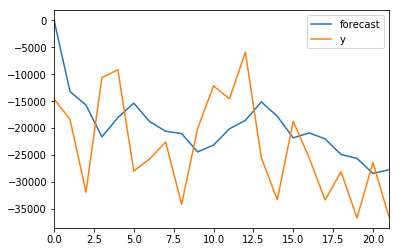

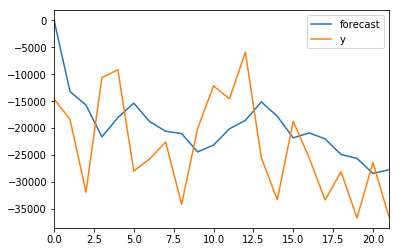

In [187]:
best_model.plot_predict()

In [149]:
temporary_model = smt.ARMA(tvs.diff(1).dropna().values, order=(2,1)).fit(method='mle',trend ='nc')

In [189]:
model = ARIMA(tvs,order=(1,1,1)).fit()

In [191]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.item_cnt_day   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -373.574
Method:                       css-mle   S.D. of innovations          19171.349
Date:                Wed, 04 Mar 2020   AIC                            755.147
Time:                        17:45:14   BIC                            761.133
Sample:                             1   HQIC                           757.161
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1929.9847    547.473     -3.525      0.001   -3003.011    -856.958
ar.L1.D.item_cnt_day     0.4257      0.163      2.616      0.014       0.107       0.745
ma.L1.D.item_cnt_day    -1.0000      0.090    -11.110      0.000      -1.176      -0.824
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3491           +0.0000j            2.3491            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [201]:
best_aic = np.inf
best_model = None
best_order = None
count = 0
for i in range(0,5):
    for j in range(0,13):
        for k in range(0,5):
            try:
                model = ARIMA(tvs,order=(i,j,k)).fit()
                temp_aic = model.aic
                if temp_aic<best_aic:
                    best_model = model
                    best_aic = temp_aic
                    best_order = (i,j,k)
                    count = count + 1
            except: continue

print('Best AIC: {} | Best Order: {} | Count: {}'.format(best_aic,best_order,count))

/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/tanweer/anaconda3/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Chec

Best AIC: 740.872832196 | Best Order: (1, 2, 2) | Count: 10


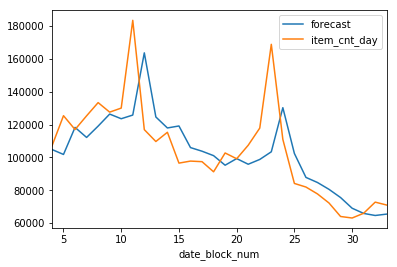

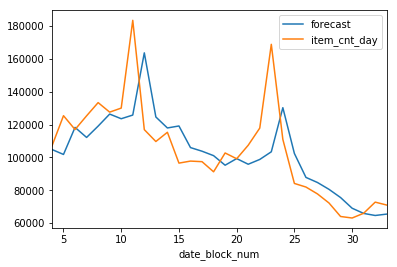

In [202]:
best_model.plot_predict()

In [206]:
import pmdarima as pm

ImportError: No module named pmdarima

In [3]:
x = np.array([1,2])

In [4]:
x.shape

(2,)

In [5]:
x[0]

1

In [6]:
x[1]

2

In [11]:
y = np.expand_dims(x,axis=3)

/home/tanweer/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


In [12]:
y

array([[1],
       [2]])

In [14]:
x = np.array([1,2][3,4])

TypeError: list indices must be integers, not tuple

In [22]:
x = np.matrix('1 2;3 4')

In [23]:
x

matrix([[1, 2],
        [3, 4]])

In [34]:
y = np.expand_dims(x,axis=1)

In [35]:
y.shape

(2, 1, 2)

In [36]:
y

array([[[1, 2]],

       [[3, 4]]])